In [1]:
import pandas as pd
import numpy as np
import datetime

#import extra shit in case I need it
import os
import warnings
import glob

#plots must be pretty 
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
from matplotlib import cm
from matplotlib.colors import TwoSlopeNorm

from matplotlib import rc, rcParams
rc('text',usetex=True)
rc('font',**{'family':'serif','serif':['Computer Modern']})
fi = 22
plt.rcParams.update({'font.size': fi-5})

In [2]:
hv_procs = pd.read_csv("HV_procs.csv")
print(hv_procs)

         Time             Type       Ability            Amount  \
0   00:22.023  Resource Change  High Voltage  1 Arcane Charges   
1   00:36.292  Resource Change  High Voltage  1 Arcane Charges   
2   00:58.278  Resource Change  High Voltage  1 Arcane Charges   
3   01:20.152  Resource Change  High Voltage  1 Arcane Charges   
4   01:42.138  Resource Change  High Voltage  1 Arcane Charges   
5   01:43.069  Resource Change  High Voltage  1 Arcane Charges   
6   02:04.048  Resource Change  High Voltage  1 Arcane Charges   
7   02:04.721  Resource Change  High Voltage  1 Arcane Charges   
8   02:26.118  Resource Change  High Voltage  1 Arcane Charges   
9   02:26.736  Resource Change  High Voltage  1 Arcane Charges   
10  03:09.895  Resource Change  High Voltage  1 Arcane Charges   
11  03:31.824  Resource Change  High Voltage  1 Arcane Charges   
12  03:32.547  Resource Change  High Voltage  1 Arcane Charges   
13  03:54.054  Resource Change  High Voltage  1 Arcane Charges   
14  03:54.

In [3]:
spell_casts = pd.read_csv("Spell_casts.csv")
print(spell_casts)

          Time  Type          Ability                Source → Target  \
0    00:14.833  Cast   Arcane Barrage  Blinkladen → Training Dummy 1   
1    00:16.041  Cast   Arcane Barrage  Blinkladen → Training Dummy 1   
2    00:18.473  Cast   Arcane Barrage  Blinkladen → Training Dummy 1   
3    00:19.701  Cast   Arcane Barrage  Blinkladen → Training Dummy 1   
4    00:20.875  Cast  Arcane Missiles  Blinkladen → Training Dummy 1   
..         ...   ...              ...                            ...   
442  12:45.563  Cast   Arcane Barrage  Blinkladen → Training Dummy 2   
443  12:48.008  Cast   Arcane Barrage  Blinkladen → Training Dummy 2   
444  12:49.167  Cast   Arcane Barrage  Blinkladen → Training Dummy 2   
445  12:51.611  Cast   Arcane Barrage  Blinkladen → Training Dummy 2   
446  12:52.876  Cast   Arcane Barrage  Blinkladen → Training Dummy 2   

     Unnamed: 4  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN  
..          ...  
442      

In [4]:
am_filter = spell_casts[spell_casts.apply(lambda r: r.str.contains('Arcane Missiles').any(), axis=1)]
abarr_filter = spell_casts[spell_casts.apply(lambda r: r.str.contains('Arcane Barrage').any(), axis=1)]

In [5]:
def format_times(input_column): 
    formatted_times = np.zeros(input_column.shape[0])
    for ind in range(input_column.shape[0]):
        formatted_times[ind] = 60*float(input_column.values[ind].split(":")[0]) + \
                                  float(input_column.values[ind].split(":")[1])
    return formatted_times

am_times = format_times(am_filter["Time"])
print(am_times)

hv_times = format_times(hv_procs["Time"])
print(hv_times)

[ 20.875  35.455  57.473  79.424 101.305 123.285 145.222 167.09  189.097
 211.041 232.977 247.61  269.464 291.478 313.422 335.36  357.199 379.221
 401.115 423.108 444.977 466.977 488.916 514.511 536.393 558.393 580.317
 583.98  605.906 631.461 653.412 675.384 697.321 715.605 737.502 759.481]
[ 22.023  36.292  58.278  80.152 102.138 103.069 124.048 124.721 146.118
 146.736 189.895 211.824 212.547 234.054 234.636 249.061 270.449 271.261
 292.547 293.116 314.318 337.004 358.595 380.004 380.226 380.449 402.059
 424.011 445.768 467.878 468.684 490.364 515.627 537.212 538.151 559.611
 581.218 584.884 585.718 607.426 633.015 654.48  676.28  676.855 698.226
 716.501 716.917 739.055 760.272 760.981]


In [6]:
#look for the shortest time between am casts as a proxy to distinguish them
min_am_cast = np.min(np.diff(am_times))

#this is a shit check, instead I shuld filter between cast starts and finishes from the log but idk where the info is
hv_procs = np.zeros(len(am_times))
for cast in range(len(am_times)):
    hv_procs[cast] = 0
    for proc in range(len(hv_times)):
        if (hv_times[proc] - am_times[cast] < min_am_cast) and (hv_times[proc] - am_times[cast] > 0):
            hv_procs[cast] = hv_procs[cast] + 1
            
print(hv_procs)

[1. 1. 1. 1. 2. 2. 2. 0. 1. 2. 2. 1. 2. 2. 1. 1. 1. 3. 1. 1. 1. 2. 1. 1.
 2. 1. 1. 2. 1. 1. 1. 2. 1. 2. 1. 2.]


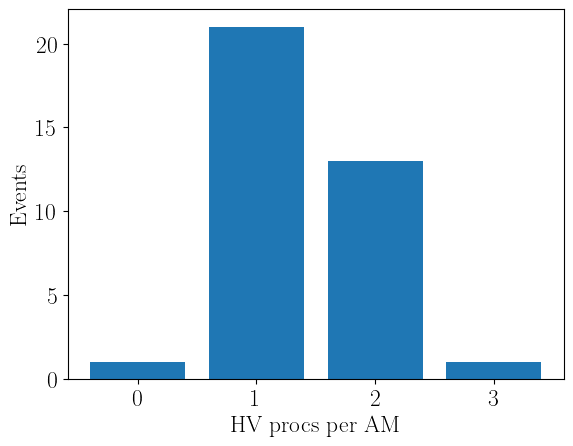

In [7]:
labels, counts = np.unique(hv_procs, return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.xlabel("HV procs per AM")
plt.ylabel("Events")
plt.savefig("HV_procs.pdf")

In [8]:
full_array = np.stack([labels, counts], axis=1)

np.savetxt("HV_distribution.txt",full_array, delimiter="\t", header="Charges\t   Counts", comments='')

In [9]:
#same test as above but with a bigger sample size and more info:
all_files = glob.glob("./Data/AM_events/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

am_events_frame = pd.concat(li, axis=0, ignore_index=True)
print(am_events_frame)

              Time                                              Event  \
0     00:20:36.339  Blinkladen Arcane Missiles Training Dummy 1 *6...   
1     00:20:36.340  Blinkladen Arcane Missiles Training Dummy 1 *6...   
2     00:20:36.590  Blinkladen Arcane Missiles Training Dummy 1 29002   
3     00:20:36.729  Blinkladen Arcane Missiles Training Dummy 1 *6...   
4     00:20:36.946  Blinkladen Arcane Missiles Training Dummy 1 *6...   
...            ...                                                ...   
1891  00:09:05.761  Blinkladen Arcane Missiles Training Dummy 1 *1...   
1892  00:09:40.948  Blinkladen Arcane Missiles Training Dummy 1 *1...   
1893  00:09:41.046  Blinkladen Arcane Missiles Training Dummy 1 1 ...   
1894  00:09:41.337  Blinkladen Arcane Missiles Training Dummy 1 1 ...   
1895  00:09:41.483  Blinkladen Arcane Missiles Training Dummy 1 1 ...   

      Unnamed: 2  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
...      

In [10]:
#same test as above but with a bigger sample size and more info:
all_files = glob.glob("./Data/Charge_procs/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

charge_procs_frame = pd.concat(li, axis=0, ignore_index=True)
print(charge_procs_frame)

              Time             Type       Ability            Amount  \
0     00:00:04.286  Resource Change  Arcane Blast  1 Arcane Charges   
1     00:00:04.289  Resource Change       Impetus  1 Arcane Charges   
2     00:00:05.917  Resource Change  High Voltage  1 Arcane Charges   
3     00:00:07.147  Resource Change  High Voltage  1 Arcane Charges   
4     00:00:11.516  Resource Change  Arcane Blast  1 Arcane Charges   
...            ...              ...           ...               ...   
1022  00:38:54.173  Resource Change  Arcane Blast  1 Arcane Charges   
1023  00:38:55.902  Resource Change  High Voltage  1 Arcane Charges   
1024  00:38:56.035  Resource Change  High Voltage  1 Arcane Charges   
1025  00:38:56.839  Resource Change  High Voltage  1 Arcane Charges   
1026  00:39:01.396  Resource Change  Arcane Blast  1 Arcane Charges   

              Source → Target  Unnamed: 5  
0     Blinkladen → Blinkladen         NaN  
1     Blinkladen → Blinkladen         NaN  
2     Blinklade

In [11]:
#same test as above but with a bigger sample size and more info:
all_files = glob.glob("./Data/Spell_casts/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

spell_casts_frame = pd.concat(li, axis=0, ignore_index=True)
print(spell_casts_frame)

              Time  Type                Ability  \
0     00:00:00.223  Cast         Arcane Barrage   
1     00:00:04.287  Cast  Arcane Blast 1.61 sec   
2     00:00:05.064  Cast        Arcane Missiles   
3     00:00:07.536  Cast         Arcane Barrage   
4     00:00:11.517  Cast  Arcane Blast 1.56 sec   
...            ...   ...                    ...   
1633  01:05:58.766  Cast         Arcane Barrage   
1634  01:06:01.234  Cast         Arcane Barrage   
1635  01:06:05.183  Cast  Arcane Blast 1.49 sec   
1636  01:06:06.127  Cast         Arcane Barrage   
1637  01:06:08.489  Cast         Arcane Barrage   

                    Source → Target  Unnamed: 4  
0     Blinkladen → Training Dummy 1         NaN  
1     Blinkladen → Training Dummy 1         NaN  
2     Blinkladen → Training Dummy 1         NaN  
3     Blinkladen → Training Dummy 1         NaN  
4     Blinkladen → Training Dummy 1         NaN  
...                             ...         ...  
1633  Blinkladen → Training Dummy 1  

In [12]:
hv_procs_filter = charge_procs_frame[charge_procs_frame.apply(lambda r: r.str.contains('High Voltage').any(), axis=1)]
print(hv_procs_filter)

              Time             Type       Ability            Amount  \
2     00:00:05.917  Resource Change  High Voltage  1 Arcane Charges   
3     00:00:07.147  Resource Change  High Voltage  1 Arcane Charges   
8     00:00:35.445  Resource Change  High Voltage  1 Arcane Charges   
9     00:00:36.272  Resource Change  High Voltage  1 Arcane Charges   
13    00:00:57.496  Resource Change  High Voltage  1 Arcane Charges   
...            ...              ...           ...               ...   
1017  00:38:26.986  Resource Change  High Voltage  1 Arcane Charges   
1018  00:38:27.756  Resource Change  High Voltage  1 Arcane Charges   
1023  00:38:55.902  Resource Change  High Voltage  1 Arcane Charges   
1024  00:38:56.035  Resource Change  High Voltage  1 Arcane Charges   
1025  00:38:56.839  Resource Change  High Voltage  1 Arcane Charges   

              Source → Target  Unnamed: 5  
2     Blinkladen → Blinkladen         NaN  
3     Blinkladen → Blinkladen         NaN  
8     Blinklade

In [13]:
am_casts_filter = spell_casts_frame[spell_casts_frame.apply(lambda r: r.str.contains('Arcane Missiles').any(), axis=1)]
print(am_casts_filter)

              Time  Type          Ability                Source → Target  \
2     00:00:05.064  Cast  Arcane Missiles  Blinkladen → Training Dummy 1   
14    00:00:34.231  Cast  Arcane Missiles  Blinkladen → Training Dummy 1   
23    00:00:56.050  Cast  Arcane Missiles  Blinkladen → Training Dummy 1   
32    00:01:17.856  Cast  Arcane Missiles  Blinkladen → Training Dummy 1   
41    00:01:39.702  Cast  Arcane Missiles  Blinkladen → Training Dummy 1   
...            ...   ...              ...                            ...   
1606  01:04:53.239  Cast  Arcane Missiles  Blinkladen → Training Dummy 1   
1609  01:05:00.503  Cast  Arcane Missiles  Blinkladen → Training Dummy 1   
1615  01:05:15.128  Cast  Arcane Missiles  Blinkladen → Training Dummy 1   
1618  01:05:22.365  Cast  Arcane Missiles  Blinkladen → Training Dummy 1   
1630  01:05:51.517  Cast  Arcane Missiles  Blinkladen → Training Dummy 1   

      Unnamed: 4  
2            NaN  
14           NaN  
23           NaN  
32         

In [14]:
def format_times(input_column): 
    formatted_times = np.zeros(input_column.shape[0])
    for ind in range(input_column.shape[0]):
        formatted_times[ind] = 3600*float(input_column.values[ind].split(":")[0]) + \
                                 60*float(input_column.values[ind].split(":")[1]) + \
                                    float(input_column.values[ind].split(":")[2])
    return formatted_times

hv_proc_format = np.sort(format_times(hv_procs_filter["Time"]))
am_dmg_format = np.sort(format_times(am_events_frame["Time"]))
am_cast_format = np.sort(format_times(am_casts_filter["Time"]))

In [20]:
#same silly thing as above - first go over all the AM casts and flag all the procs/casts
min_am_cast = np.min(np.diff(am_cast_format))

#loop over all AM casts, and if a HV proc is close enough in time, we assign it to that AM cast and record it
hv_procs_on_cast = np.zeros(len(am_cast_format))
for cast in range(len(am_cast_format)):
    hv_procs_on_cast[cast] = 0
    for proc in range(len(hv_proc_format)):
        if (hv_proc_format[proc] - am_cast_format[cast] < min_am_cast) and (hv_proc_format[proc] - am_cast_format[cast] > 0):
            hv_procs_on_cast[cast] = hv_procs_on_cast[cast] + 1

#TBD: loop over all AM casts. For each cast loop over all the AM damage events, and check if at that time there is a HV proc. 
hv_procs_on_dmg = np.zeros(len(am_cast_format))
hv_procs_on_tick = np.zeros(8)
for cast in range(len(am_cast_format)):
    hv_procs_on_dmg[cast] = 0
    for dmg in range(8):
        am_tick = am_dmg_format[cast*8+dmg]
        for proc in range(len(hv_proc_format)):
            if (hv_proc_format[proc] - am_tick < 0.11) and (hv_proc_format[proc] - am_tick > 0):
                hv_procs_on_dmg[cast] = hv_procs_on_dmg[cast] + 1
                hv_procs_on_tick[dmg] = hv_procs_on_tick[dmg] + 1
    
print(hv_procs_on_tick)

[51. 37. 38. 32. 29. 26. 24. 24.]
0.11943793911007025


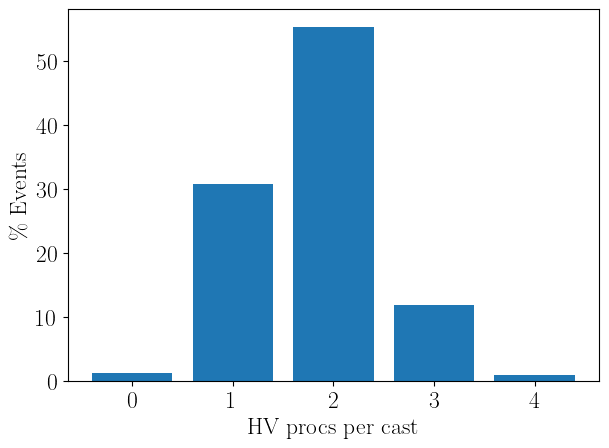

In [16]:
labels_cast, counts_cast = np.unique(hv_procs_on_cast, return_counts=True)

plt.bar(labels_cast, counts_cast/np.sum(counts_cast)*100, align='center',label="Procs per cast")
plt.gca().set_xticks(labels_cast)
plt.xlabel("HV procs per cast")
plt.ylabel("$\\%$ Events")
plt.tight_layout()
plt.savefig("HV_procs.pdf")

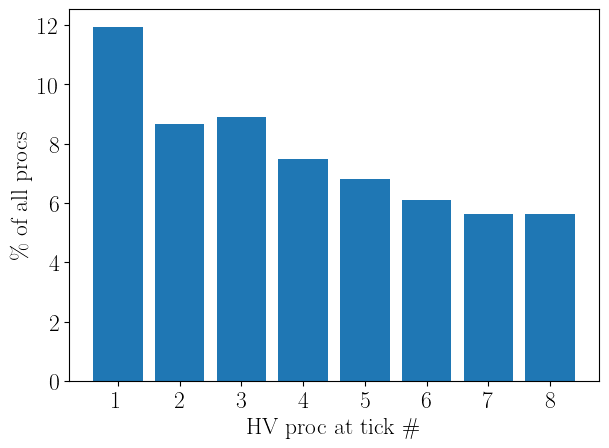

In [30]:
labels_dmg = [1,2,3,4,5,6,7,8]
plt.bar(labels_dmg, 100*hv_procs_on_tick/hv_proc_format.shape[0], align='center',label="Procs at tick")
plt.gca().set_xticks(labels_dmg)
plt.xlabel("HV proc at tick $\\#$")
plt.ylabel("$\\%$ of all procs")
plt.tight_layout()
plt.savefig("HV_proc_at_tick.pdf")

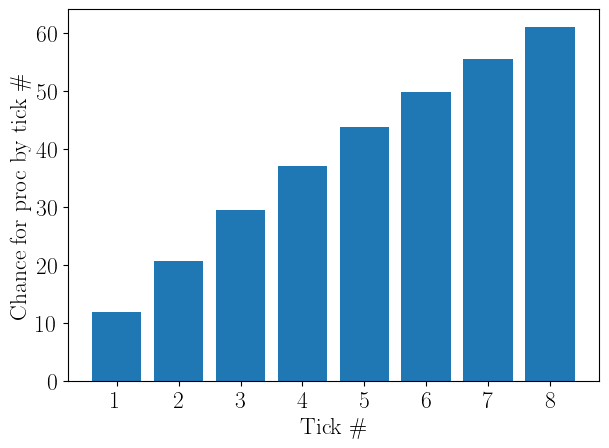

In [31]:
cdf = np.cumsum(100*hv_procs_on_tick/hv_proc_format.shape[0])

plt.bar(labels_dmg, cdf, align='center',label="Procs at tick")
plt.gca().set_xticks(labels_dmg)
plt.xlabel("Tick $\\#$")
plt.ylabel("Chance for proc by tick $\\#$")
plt.tight_layout()
plt.savefig("HV_cdf.pdf")